# Exploratory Data Analysis

In [10]:
# regular imports
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as numpy

import matplotlib.pyplot as plt
plt.style.use('seaborn')

from datetime import datetime

In [11]:
# importing Vader Sentiment to assign score(s) to each tweet
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [12]:
polls = pd.read_csv('../president_polls.csv')
data = pd.read_csv('data.csv')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (0,2,3,5,9,10,15,16,19,25,26,27,32) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
# 'query' to get polling numbers for three dates for either candidate from any state
def get_polling(state, candidate):
    clean = polls.loc[((polls['state'] == state) & 
                      (polls['end_date'] == '9/30/20') | (polls['end_date'] == '10/1/20') | (polls['end_date'] == '10/2/20'))
                      & ((polls['answer'] != 'Jorgensen') & (polls['answer'] != 'Hawkins'))
                      & ((polls['answer'] == candidate))]
    return clean.iloc[::-1]


# plot polling numbers for three dates for either candidate from any state
def plot_polls(state):
    x = get_polling(state, 'Biden').end_date
    biden = get_polling(state, 'Biden').pct
    trump = get_polling(state, 'Trump').pct
    
    fig, ax = plt.subplots(figsize = (20, 5))

    ax.scatter(x, biden, color = 'blue', label = 'Joseph R. Biden Jr', linewidth=3, alpha = 0.2)
    ax.scatter(x, trump, color = 'red', label = 'Donald J. Trump', linewidth=3, alpha = 0.2)
    ax.set_title('{} Polls 9/30 - 10/2'.format(state))

# function to take in a string, a format, and return a time stamp
def string_to_dt(string, structure):
    
    # structure example: '%Y-%m-%d %H:%M:%S+00:00'

    date_time_string = string

    date_time_obj = datetime.strptime(date_time_string, structure)

    return datetime.timestamp(date_time_obj)

In [5]:
# building a list of VADER compound scores
compound_score = []

analyzer = SentimentIntensityAnalyzer()
for x in data.full_text:
    vs = analyzer.polarity_scores(x)
    compound_score.append(vs['compound'])

# adding compound scores to dataset
data['comp_score'] = compound_score

# only getting data when compound score is not zero
no_zero = data.loc[data['comp_score'] != 0]

y=0.000001x+(-1248.918059)


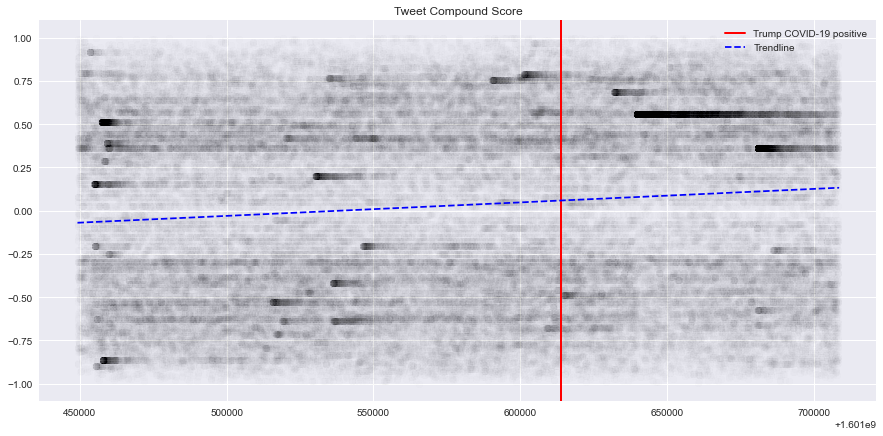

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 7))

x_axis = []

for x in no_zero.created_at:
    x_axis.append(string_to_dt(x))

ax.scatter(x_axis, no_zero.comp_score, color = 'black', alpha = 0.009);


# 1601613907 is 10/2/2020 4:45AM UTC, when Trump tweeted that he had COVID-19
ax.axvline(1601613907, -.1, 1, linewidth=2, color='red', label= 'Trump COVID-19 positive');


# line of best fit 
z = numpy.polyfit(x_axis, no_zero.comp_score.head(length), 1)
p = numpy.poly1d(z)
ax.plot(x_axis,p(x_axis),"b--", label = "Trendline")
ax.set_title("Tweet Compound Score")

# the line equation:
# print ("y=%.6fx+(%.6f)"%(z[0],z[1]))

ax.legend(loc=1)